<a href="https://colab.research.google.com/github/CS7140/PA-6/blob/main/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rajesh Sakhamuru

10-25-2020
# Human Activity Recognition CNN Model

UCI HAR Dataset is located at: https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones .

Please download it and modify file-paths accordingly to run the code.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.math import confusion_matrix
from tensorflow.distribute import MirroredStrategy

In [3]:
strategy = MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


# Train Model

In [4]:
with strategy.scope():
    # import training data
    X_train = pd.read_csv("drive/My Drive/CS7140 Colab/data/UCI HAR Dataset/train/X_train.txt",  header=None, dtype=str)
    X_train = X_train[0].str.split(expand=True)
    X_train = tf.convert_to_tensor(X_train.astype('float32'))
    y_train = pd.read_csv("drive/My Drive/CS7140 Colab/data/UCI HAR Dataset/train/y_train.txt",  header=None, dtype=str)
    y_train = y_train.astype('float32') - 1
    y_train = tf.convert_to_tensor(tf.keras.utils.to_categorical(y_train))

    # import testing data
    X_test = pd.read_csv("drive/My Drive/CS7140 Colab/data/UCI HAR Dataset/test/X_test.txt",  header=None, dtype=str)
    X_test = X_test[0].str.split(expand=True)
    X_test = tf.convert_to_tensor(X_test.astype('float32'))
    y_test = pd.read_csv("drive/My Drive/CS7140 Colab/data/UCI HAR Dataset/test/y_test.txt",  header=None, dtype=str)
    y_test = y_test.astype('float32') - 1
    y_test = tf.convert_to_tensor(tf.keras.utils.to_categorical(y_test))

    # subject_test = pd.read_csv("drive/My Drive/CS7140 Colab/data/UCI HAR Dataset/test/subject_test.txt",  header=None, dtype=str)
    # subject_train = pd.read_csv("drive/My Drive/CS7140 Colab/data/UCI HAR Dataset/train/subject_train.txt",  header=None, dtype=str)

    # Shuffle Training and Test Data
    perm = tf.random.shuffle(tf.range(tf.shape(X_train)[0]))
    X_train = tf.gather(X_train, perm, axis=0)
    y_train = tf.gather(y_train, perm, axis=0)
    perm1 = tf.random.shuffle(tf.range(tf.shape(X_test)[0]))
    X_test = tf.gather(X_test, perm1, axis=0)
    y_test = tf.gather(y_test, perm1, axis=0)


    X_train = tf.reshape(X_train,[len(X_train), 33,17,1])
    X_test = tf.reshape(X_test,[len(X_test), 33,17,1])
    

In [13]:
with strategy.scope():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(33,17,1)))
    model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=3, activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size=3, activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size=3, activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(6, activation='softmax'))

    opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

    model_history = model.fit(X_train, y_train, epochs=35, batch_size=128, validation_data=(X_test, y_test), verbose=2)

Epoch 1/35
58/58 - 2s - loss: 1.4113 - accuracy: 0.4064 - val_loss: 0.7468 - val_accuracy: 0.6342
Epoch 2/35
58/58 - 1s - loss: 0.5947 - accuracy: 0.7369 - val_loss: 0.3836 - val_accuracy: 0.8375
Epoch 3/35
58/58 - 1s - loss: 0.3930 - accuracy: 0.8361 - val_loss: 0.3086 - val_accuracy: 0.8527
Epoch 4/35
58/58 - 1s - loss: 0.3236 - accuracy: 0.8666 - val_loss: 0.2491 - val_accuracy: 0.8935
Epoch 5/35
58/58 - 1s - loss: 0.2622 - accuracy: 0.8949 - val_loss: 0.2139 - val_accuracy: 0.9169
Epoch 6/35
58/58 - 1s - loss: 0.2277 - accuracy: 0.9064 - val_loss: 0.1934 - val_accuracy: 0.9328
Epoch 7/35
58/58 - 1s - loss: 0.1936 - accuracy: 0.9237 - val_loss: 0.1803 - val_accuracy: 0.9284
Epoch 8/35
58/58 - 1s - loss: 0.1690 - accuracy: 0.9351 - val_loss: 0.1590 - val_accuracy: 0.9335
Epoch 9/35
58/58 - 1s - loss: 0.1465 - accuracy: 0.9429 - val_loss: 0.1469 - val_accuracy: 0.9471
Epoch 10/35
58/58 - 1s - loss: 0.1406 - accuracy: 0.9464 - val_loss: 0.1630 - val_accuracy: 0.9399
Epoch 11/35
58/58 -

Below is the architecture of the CNN which I trained with the UCI HAR Dataset. Each record consisted of a 561-feature vector with time and frequency domain variables. Each of these vectors was converted to a (33, 17, 1) shape tensor analogous to an image and used to train the CNN. The model used 2 convolutional layers (each had 2 convolution layers within it and a pooling layer) and that fed into a 3-layer fully connected network for classification. For Activation functions where applicable I used the ReLU function except in the last layer where I used the SoftMax function for multiclass classfication.

The Training accuracy of the trained model is ~99% and the Testing accuracy is ~96%, which is a significant improvement over the 89% from the SVM implementation.

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 33, 17, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 33, 17, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 8, 64)         0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 8, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 8, 128)        73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 8, 128)        147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 4, 128)         0

## Records visualized as images:

Actual:      ['LAYING', 'LAYING', 'STANDING', 'STANDING', 'WALKING', 'SITTING', 'LAYING', 'WALKING_UPSTAIRS', 'STANDING']
Prediction:  ['LAYING', 'LAYING', 'STANDING', 'STANDING', 'WALKING', 'SITTING', 'LAYING', 'WALKING_UPSTAIRS', 'STANDING']


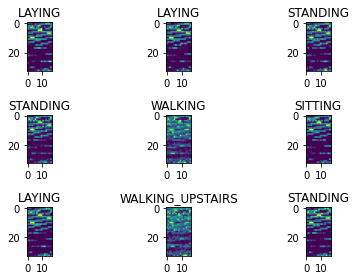

In [14]:
labelDict = {0:'WALKING', 1:'WALKING_UPSTAIRS', 2:'WALKING_DOWNSTAIRS', 3:'SITTING', 4:'STANDING', 5:'LAYING'}
actuals = [labelDict[np.argmax(i)] for i in y_test[:9]]
preds = [labelDict[np.argmax(i)] for i in model.predict(X_test[:9])]
print("Actual:     ", actuals)
print("Prediction: ", preds)
for i in range(9):
    plt.subplot(330 + 1 + i)
    # plt.xlabel('Pred: ' + preds[i])
    plt.title(actuals[i])
    plt.imshow(tf.squeeze(X_test[i]))
plt.tight_layout()
plt.show()

# Evaluate Model
As we can see from training the model with the given data, the Training accuracy reached 99% and the Testing accuracy reached 96%. This is a significant improvement over the SVM implementation which resulted in an 89% accuracy.

From the two graphs below we can see that after around 13 epochs, there is little to no improvement in the Test Accuracy and loss and the Train accuracy and loss continue to improve. Without dropout between layers it is likely that after this point, the model would overfit to the training data after 13 epochs.

Below we have a confusion matrix as well as precision and recall per category which allows us to see which categories are best modeled by the CNN. We can see that 'LAYING' achieved the best classification results, with 100% recall and 99.8% precision. We can see that 'SITTING' and 'STANDING', although not too frequently, could often be misclassified for each other due to the similarities in data data patterns. Even just from visual inspection of the 'data images' sitting and standing look quite similar. We can also see that 'WALKING_UPSTAIRS' was sometimes misclassified as 'WALKING' and 'WALKING_DOWNSTAIRS' was sometimes misclassified as 'WALKING_UPSTAIRS'. 

Of the 6 categories we can see that 'SITTING' had the lowest recall and a low precision value compared to the other categories, which shows that it is the category with the most room for improvement in the model.

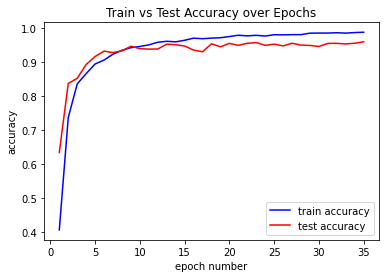

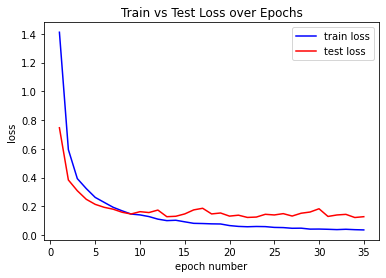

In [32]:
plt.title("Train vs Test Accuracy over Epochs")
plt.plot(range(1,36), model_history.history['accuracy'], 'b-', label='train accuracy')
plt.plot(range(1,36), model_history.history['val_accuracy'], 'r-', label='test accuracy')
plt.ylabel("accuracy")
plt.xlabel("epoch number")
plt.legend()
plt.show()

plt.title("Train vs Test Loss over Epochs")
plt.plot(range(1,36), model_history.history['loss'], 'b-', label='train loss')
plt.plot(range(1,36), model_history.history['val_loss'], 'r-', label='test loss')
plt.ylabel("loss")
plt.xlabel("epoch number")
plt.legend()
plt.show()

In [29]:
def groupedBarPlot(list1, list2, classes, title, ylabel):
    '''
    plots grouped bar plot of 2 lists, over the classes
    
    :param list1: list 1 of data
    :param list2: list 2 of data
    :param classes: classes of x axis
    :param title: graph title
    :param ylabel: y axis label
    '''

    labels = classes
    bern = list1
    mult = list2

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    ax.bar(x - width / 2, bern, width, label='Precision')
    ax.bar(x + width / 2, mult, width, label='Recall')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc='lower right')

    fig.tight_layout()

    plt.show()

Columns are Predictions, Rows are Actual:
            WALKING  UPSTAIRS  DOWNSTAIRS  SITTING  STANDING   LAYING    Recall
WALKING     483.000     5.000       8.000    0.000     0.000    0.000  0.973790
UPSTAIRS     22.000   445.000       4.000    0.000     0.000    0.000  0.944798
DOWNSTAIRS    6.000    18.000     396.000    0.000     0.000    0.000  0.942857
SITTING       0.000     2.000       0.000  459.000    29.000    1.000  0.934827
STANDING      0.000     0.000       0.000   22.000   510.000    0.000  0.958647
LAYING        0.000     0.000       0.000    0.000     0.000  537.000  1.000000
Precision     0.945     0.947       0.971    0.954     0.946    0.998       NaN


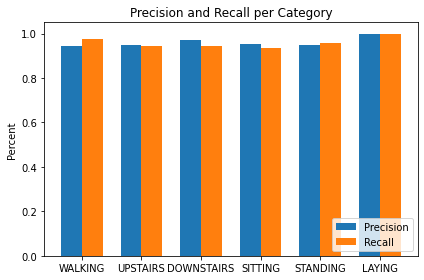

In [31]:
preds = [np.argmax(i) for i in model.predict(X_test)]
actual = [np.argmax(i) for i in y_test]
# colNames = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
colNames = ['WALKING', 'UPSTAIRS', 'DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

# predictins are columns, actual are rows
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
confMtrx = pd.DataFrame(confusion_matrix(actual, preds).numpy(), columns=colNames)
confMtrx.index=colNames
print("Columns are Predictions, Rows are Actual:")

truePos = pd.DataFrame(pd.Series(np.diag(confMtrx), index=[confMtrx.index]))
rowSums = pd.DataFrame(confMtrx.sum(axis=1))
colSums = pd.DataFrame(confMtrx.sum(axis=0))

# calc precision and recall per category
recallList = pd.DataFrame(truePos[0].tolist()) / pd.DataFrame(rowSums[0].tolist())
precisionList = pd.DataFrame(truePos[0].tolist()) / pd.DataFrame(colSums[0].tolist())
recallList.index=colNames
precisionList.index=colNames

pList = np.array(precisionList)
precDict = {}
c = 0
for col in colNames:
    precDict[col] = round(pList[c][0],3)
    c += 1

# add prec and recall to confusion matrix
confMtrx['Recall'] = recallList
confMtrx = confMtrx.append(precDict, ignore_index=True)
confMtrx.index=['WALKING', 'UPSTAIRS', 'DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING', 'Precision']
print(confMtrx)

# recall vs precision bar-graph
groupedBarPlot(precisionList[0].tolist(), recallList[0].tolist(), colNames, "Precision and Recall per Category", "Percent")